In [1]:
import math
from itertools import combinations,permutations
import igraph as ig
import random
from libs.order_based_seed_gen.numbering import *

In [2]:
sub=["d",5,4]
big=sorted(["a","f","d","fd","ee"])

In [3]:
print([math.factorial(i) for i in range(len(big)+1)])

[1, 1, 2, 6, 24, 120]


In [4]:
for i in range(len(big)+1):
    for perm in permutations(big,i):
        print(perm)
        print(generatePermutationNumber(perm,big))

()
0
('a',)
0
('d',)
0
('ee',)
0
('f',)
0
('fd',)
0
('a', 'd')
0
('a', 'ee')
0
('a', 'f')
0
('a', 'fd')
0
('d', 'a')
1
('d', 'ee')
0
('d', 'f')
0
('d', 'fd')
0
('ee', 'a')
1
('ee', 'd')
1
('ee', 'f')
0
('ee', 'fd')
0
('f', 'a')
1
('f', 'd')
1
('f', 'ee')
1
('f', 'fd')
0
('fd', 'a')
1
('fd', 'd')
1
('fd', 'ee')
1
('fd', 'f')
1
('a', 'd', 'ee')
0
('a', 'd', 'f')
0
('a', 'd', 'fd')
0
('a', 'ee', 'd')
1
('a', 'ee', 'f')
0
('a', 'ee', 'fd')
0
('a', 'f', 'd')
1
('a', 'f', 'ee')
1
('a', 'f', 'fd')
0
('a', 'fd', 'd')
1
('a', 'fd', 'ee')
1
('a', 'fd', 'f')
1
('d', 'a', 'ee')
2
('d', 'a', 'f')
2
('d', 'a', 'fd')
2
('d', 'ee', 'a')
3
('d', 'ee', 'f')
0
('d', 'ee', 'fd')
0
('d', 'f', 'a')
3
('d', 'f', 'ee')
1
('d', 'f', 'fd')
0
('d', 'fd', 'a')
3
('d', 'fd', 'ee')
1
('d', 'fd', 'f')
1
('ee', 'a', 'd')
4
('ee', 'a', 'f')
2
('ee', 'a', 'fd')
2
('ee', 'd', 'a')
5
('ee', 'd', 'f')
2
('ee', 'd', 'fd')
2
('ee', 'f', 'a')
3
('ee', 'f', 'd')
3
('ee', 'f', 'fd')
0
('ee', 'fd', 'a')
3
('ee', 'fd', 'd')
3
('

In [5]:
def generateCombinationNumberLight(sublist, totalList):
    eligibleList=sorted(totalList)
    voterList=sorted(sublist)
    combiNumber=0

    #Simplified expression? Sum(i=0:V-1|sum(k=1:(j(i)-j(i-1))-i|C(V-1 among N-j(i)+1)))
    
    nVoters=len(voterList)
    nEligible=len(eligibleList)
    nHoles=nEligible-nVoters
    
    foundHoles=0
    foundVoters=0
    
    j=searchFromIn(voterList,eligibleList)
    
    for i in range(nVoters):
        voter=voterList[i]
        
        if i==0:
            diff=j(i)
        else:
            diff=j(i)-(j(i-1)+1)

        for hole in range(0,diff):#if diff=0 range outputs []
            combiNumber+=nbCombi(nVoters-(i+1),nEligible-(j(i)-hole))

    return combiNumber

In [6]:
def generateCombinationNumberLightest(sublist, totalList):
    eligibleList=sorted(totalList)
    voterList=sorted(sublist)

    #Simplified expression:
    #=Sum(k=0:(j(0)-1)|C(V-1 among N-j(0)+k))
    #+Sum(i=1:V-1|sum(k=0:(j(i)-j(i-1)-2)|C(V-(i+1) among N-j(i)+k)))
    
    nVoters=len(voterList)
    nEligible=len(eligibleList)
    
    j=searchFromIn(voterList,eligibleList)

    firstElement=sum([nbCombi(nVoters-1,nEligible-j(0)+k)  for k in range(0,j(0))])
    combiNumber=firstElement+sum([
                                sum([
                                    nbCombi(nVoters-i-1,nEligible-j(i)+k) 
                                    for k in range(0,j(i)-j(i-1)-1)]) 
                                for i in range(1,nVoters)])
    return combiNumber

In [7]:
for i in range(len(big)+1):
    for perm in combinations(big,i):
        print(perm)
        ref=generateCombinationNumber(perm,big)
        light=generateCombinationNumberLight(perm,big)
        lightest=generateCombinationNumberLightest(perm,big)
        print(ref,light,lightest)
        assert(ref==light)
        assert(ref==lightest)

()
0 0 0
('a',)
0 0 0
('d',)
1 1 1
('ee',)
2 2 2
('f',)
3 3 3
('fd',)
4 4 4
('a', 'd')
0 0 0
('a', 'ee')
1 1 1
('a', 'f')
2 2 2
('a', 'fd')
3 3 3
('d', 'ee')
4 4 4
('d', 'f')
5 5 5
('d', 'fd')
6 6 6
('ee', 'f')
7 7 7
('ee', 'fd')
8 8 8
('f', 'fd')
9 9 9
('a', 'd', 'ee')
0 0 0
('a', 'd', 'f')
1 1 1
('a', 'd', 'fd')
2 2 2
('a', 'ee', 'f')
3 3 3
('a', 'ee', 'fd')
4 4 4
('a', 'f', 'fd')
5 5 5
('d', 'ee', 'f')
6 6 6
('d', 'ee', 'fd')
7 7 7
('d', 'f', 'fd')
8 8 8
('ee', 'f', 'fd')
9 9 9
('a', 'd', 'ee', 'f')
0 0 0
('a', 'd', 'ee', 'fd')
1 1 1
('a', 'd', 'f', 'fd')
2 2 2
('a', 'ee', 'f', 'fd')
3 3 3
('d', 'ee', 'f', 'fd')
4 4 4
('a', 'd', 'ee', 'f', 'fd')
0 0 0


In [8]:
list(range(0))


[]

In [9]:
numberingList=[]
for i in range(len(big)):
    for permut in permutations(big,i):
        print(permut)
        numberingList.append(generateArrangementNumber(permut,big))
        print(numberingList[-1])
print("numberingList:",sorted(numberingList))
print("len:",len(numberingList))
sortedList=sorted(numberingList)
for i in range(len(sortedList)-1):
    assert i==sortedList[i], "i:{} ; list[i]:{}".format(i,sortedList[i])
    assert sortedList[i]+1==sortedList[i+1], "list[i]:{} ; list[i+1]:{}".format(sortedList[i],sortedList[i+1])


()
0
('a',)
1
('d',)
2
('ee',)
3
('f',)
4
('fd',)
5
('a', 'd')
6
('a', 'ee')
8
('a', 'f')
10
('a', 'fd')
12
('d', 'a')
7
('d', 'ee')
14
('d', 'f')
16
('d', 'fd')
18
('ee', 'a')
9
('ee', 'd')
15
('ee', 'f')
20
('ee', 'fd')
22
('f', 'a')
11
('f', 'd')
17
('f', 'ee')
21
('f', 'fd')
24
('fd', 'a')
13
('fd', 'd')
19
('fd', 'ee')
23
('fd', 'f')
25
('a', 'd', 'ee')
26
('a', 'd', 'f')
32
('a', 'd', 'fd')
38
('a', 'ee', 'd')
27
('a', 'ee', 'f')
44
('a', 'ee', 'fd')
50
('a', 'f', 'd')
33
('a', 'f', 'ee')
45
('a', 'f', 'fd')
56
('a', 'fd', 'd')
39
('a', 'fd', 'ee')
51
('a', 'fd', 'f')
57
('d', 'a', 'ee')
28
('d', 'a', 'f')
34
('d', 'a', 'fd')
40
('d', 'ee', 'a')
29
('d', 'ee', 'f')
62
('d', 'ee', 'fd')
68
('d', 'f', 'a')
35
('d', 'f', 'ee')
63
('d', 'f', 'fd')
74
('d', 'fd', 'a')
41
('d', 'fd', 'ee')
69
('d', 'fd', 'f')
75
('ee', 'a', 'd')
30
('ee', 'a', 'f')
46
('ee', 'a', 'fd')
52
('ee', 'd', 'a')
31
('ee', 'd', 'f')
64
('ee', 'd', 'fd')
70
('ee', 'f', 'a')
47
('ee', 'f', 'd')
65
('ee', 'f', 'f

In [10]:
formatedGraphPath="../graphs/formatted/"

In [11]:
def formatVertexIds(file_path, delemiter=" "):
    """ We expect a file containing row of the format
        vertexId delemiter vertexId
    """
    fileName = file_path.split("/")[-1]
    new_file_path = formatedGraphPath + fileName 
    with open(new_file_path,'w') as formated_file:
        with open(file_path) as old_file:
                for line in old_file:
                    columns = line.split(delemiter)
                    formated_file.write("V" + columns[0] + delemiter + "V" + columns[1])

In [12]:
def orderBasedWorkerSelection(filename, nVoters, nWorkers, voterSeed, format="ncol", numGenFunction=generateArrangementNumber):
    filepath = formatedGraphPath + "/" + filename
    graph=ig.Graph.Read(filepath,format="ncol").as_undirected()
    
    vertices = graph.vs["name"]
    
    random.seed(voterSeed) 
    
    voters = random.sample(vertices, nVoters)
    
    seed = numGenFunction(voters, vertices)
    
    random.seed(seed)
    
    workers = random.sample(vertices, nWorkers)
    
    return workers

workersList=orderBasedWorkerSelection("facebook_combined.txt", 85, 100)

biggest=range(0,20)
rev=biggest[::-1]
print(len(biggest),generateArrangementNumber(rev,biggest))

from matplotlib import pyplot as plt
fig,ax = plt.subplots()
X=list(range(1,100))
Y=[list(map(lambda x:generateArrangementNumber(list(range(x))[::-1][:x//k],range(x)),X)) for k in range(1,10,2)]
print(X)
print(Y)
ax.set_yscale("log")
ax.grid()
for y in Y:
    ax.plot([X[idx] for idx,i in enumerate(y) if i>0],[i for i in y if i>0])


list(range(10))[::-1][:10//3]

In [283]:
def C(k,n): 
    #print("kn",k,n)
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [284]:
def proba(m,M,n,P):
    #print("p",m,M,n,P)
    #print("c1",C(m,M))
    #print("c2",C(n-m,P-M))
    #print("c3",C(n,P))
    if m>n:
        return 0
    if n-m > P-M:
        return 0
    return C(m,M)*C(n-m,P-M)/C(n,P)

In [285]:
def probaInf(m,M,n,P):
    #print("p",m,M,n,P)
    #print("c1",C(m,M))
    #print("c2",C(n-m,P-M))
    #print("c3",C(n,P))
    #print([proba(minf,M,n,P) for minf in range(m+1)])
    if m>n:
        return 1
    if n-m > P-M:
        return 0
    return sum([proba(minf,M,n,P) for minf in range(max(0,n-P+M),m+1)])

In [308]:
import itertools
P=100
M=50
n=range(P+1)
m=range(M+1)
cumul=False
fn=probaInf if cumul else proba
probasNM={(mi,ni):fn(mi,M,ni,P) for mi,ni in itertools.product(m,n) }

In [309]:
print(probasNM)

{(0, 0): 1.0, (0, 1): 0.5, (0, 2): 0.2474747474747475, (0, 3): 0.12121212121212122, (0, 4): 0.05873164636051234, (0, 5): 0.028142247214412164, (0, 6): 0.013330538154195236, (0, 7): 0.006239826370048833, (0, 8): 0.0028850810098075253, (0, 9): 0.0013171022001295224, (0, 10): 0.0005934196725858287, (0, 11): 0.00026374207670481277, (0, 12): 0.00011557237069087301, (0, 13): 4.990625098014971e-05, (0, 14): 2.1224497543282062e-05, (0, 15): 8.884673390211095e-06, (0, 16): 3.658394925381039e-06, (0, 17): 1.4807788983685158e-06, (0, 18): 5.887434174236268e-07, (0, 19): 2.2975352875068365e-07, (0, 20): 8.793036285519992e-08, (0, 21): 3.2973886070699965e-08, (0, 22): 1.2104337924687328e-08, (0, 23): 4.345146947323656e-09, (0, 24): 1.5236229555550485e-09, (0, 25): 5.212394321635692e-10, (0, 26): 1.737464773878564e-10, (0, 27): 5.635020888254802e-11, (0, 28): 1.7754175401350747e-11, (0, 29): 5.424886928190506e-12, (0, 30): 1.6045440210140931e-12, (0, 31): 4.584411488611696e-13, (0, 32): 1.2623741780

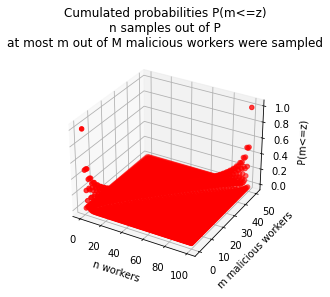

In [310]:

# importing libraries 
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
  
# defining surface and axes 
y,x,z=([k[0] for k in probasNM.keys()],[k[1] for k in probasNM.keys()],list(probasNM.values()))
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
ax.scatter(x, y, z, c='r', marker='o')
# syntax for plotting 
#ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='green') 
ax.set_title('Cumulated probabilities P(m<=z)\nn samples out of P\nat most m out of M malicious workers were sampled') 
ax.set_xlabel("n workers")
ax.set_ylabel("m malicious workers")
ax.set_zlabel("P(m<=z)")
plt.show() 
fig.savefig("ProbabilitiesPts.png")

[[1.         0.5        0.24747475 ... 0.         0.         0.        ]
 [0.         0.5        0.50505051 ... 0.         0.         0.        ]
 [0.         0.         0.24747475 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.24747475 0.         0.        ]
 [0.         0.         0.         ... 0.50505051 0.5        0.        ]
 [0.         0.         0.         ... 0.24747475 0.5        1.        ]]


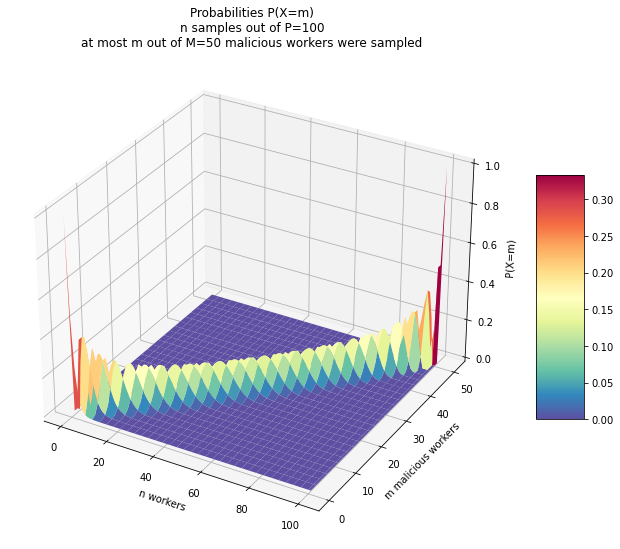

In [311]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
  
# defining surface and axes 
x = np.outer(np.linspace(0, M+1, M+1), np.ones(P+1)) 
y = np.outer(np.linspace(0, P+1, P+1), np.ones(M+1)).T
z = list(probasNM.values())
z = np.array([z[lim*(P+1):(lim+1)*(P+1)]for lim in range(M+1)])
print(z)
# Creating figyre 
fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d') 
  
# Creating plot 
my_cmap = plt.get_cmap('Spectral_r') 
surf = ax.plot_surface(y, x, z, 
                       cmap = my_cmap, 
                       edgecolor ='none') 
fig.colorbar(surf, ax = ax, 
             shrink = 0.5, aspect = 5) 
# show plot 
ax.set_title('{}robabilities P(X{}=m)\nn samples out of P={P}\nat most m out of M={M} malicious workers were sampled'.format(
                "Cumulated p" if cumul else "P",
                "<" if cumul else "",
                P=P,
                M=M)
            ) 
ax.set_xlabel("n workers")
ax.set_ylabel("m malicious workers")
ax.set_zlabel("P(X{}=m)".format("<" if cumul else ""))
plt.show() 
fig.savefig("Probabilities{}_n_of_{},m_of_{}.png".format("Cumulated" if cumul else "",P,M))

In [312]:
print(probasNM[(10,100)])

0
